In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt


# On an image

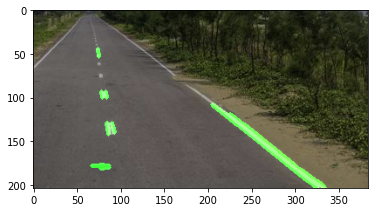

In [105]:
img = cv.imread('/Users/jxxt/Desktop/Random/CV/road2.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    #match_mask_color = (255,) * channel_count
    match_mask_color = 255
    cv.fillPoly(mask,vertices,match_mask_color)
    masked_img = cv.bitwise_and(img,mask)
    return masked_img

def draw_lines(img,lines):
    imgc = np.copy(img)
    line_img = np.zeros((imgc.shape[0],imgc.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv.line(line_img,(x1,y1),(x2,y2),(0,255,0),thickness=3)
    img = cv.addWeighted(img,0.8,line_img,1,0.0)
    return img
            

height = img.shape[0]
width = img.shape[1]
roi_vertices = [(0,height),(width/5,height/5),(width,height)]

grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(grey,100,200)
cropped_img = region_of_interest(edges,np.array([roi_vertices],np.int32))

plt.imshow(cropped_img)

lines = cv.HoughLinesP(cropped_img,1,np.pi/180,10,minLineLength=5,maxLineGap=5)

image = draw_lines(img,lines)

plt.imshow(image)

# Video

In [106]:
def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    #match_mask_color = (255,) * channel_count
    match_mask_color = 255
    cv.fillPoly(mask,vertices,match_mask_color)
    masked_img = cv.bitwise_and(img,mask)
    return masked_img

def draw_lines(img,lines):
    imgc = np.copy(img)
    line_img = np.zeros((imgc.shape[0],imgc.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv.line(line_img,(x1,y1),(x2,y2),(0,255,0),thickness=3)
    img = cv.addWeighted(img,0.8,line_img,1,0.0)
    return img
            
def process(img):
    height = img.shape[0]
    width = img.shape[1]
    roi_vertices = [(0,height),(width/2,height/1.65),(width,height)]
    grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    edges = cv.Canny(grey,100,200)
    cropped_img = region_of_interest(edges,np.array([roi_vertices],np.int32))
    lines = cv.HoughLinesP(cropped_img,1,np.pi/60,10,minLineLength=5,maxLineGap=5)
    if lines is None : 
        return img
    image_with_lines = draw_lines(img,lines)
    return image_with_lines

cap = cv.VideoCapture('/Users/jxxt/Desktop/Random/CV/road_lane.mp4')
while True:
    ret, frame = cap.read()
    if ret:
        frame = process(frame)
        cv.imshow('frame',frame)
    else:
        break
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()
for i in range (1,5):
    cv.waitKey(1)